# Deep Learning course - LAB 7

## Images in Python and PyTorch - usage of DataLoaders

### Welcome to the fantastic world of Computer Vision!

This Lab will roughly be split in two logically-connected sections:

1. Image manipulation using OpenCV: we will have a quick tour of OpenCV Python API for image management and manipulation.
2. We will learn how to construct a custom Dataset in PyTorch (both in time-efficient and memory-efficient ways) and how to feed Datasets into DataLoaders for ANN training. Here, we will use the basics learned in Part 1 to construct specific data augmentation techniques.

## 1. Introduction to OpenCV

OpenCV is a library for real-time Computer Vision (CV) applications, originally developed by Intel, programmed in C++ and providing a useful Python wrapper.

It can be installed with pip with `pip install opencv-python`. Since the whole of the library has been recently rendered unusable due to trademark reasons (i.e., some of the algorithm implemented there were copyrighted and could not be freely used on OpenCV), there exists an extended version of OpenCV called `opencv-contrib-python` which re-implements these. We will be using the main library since we will not be needing those additional functionalities.

In [6]:
import torch
import cv2 #opencv
from matplotlib import pyplot as plt
import numpy as np

### Image IO and basics

Load images into memory with `cv2.imread`

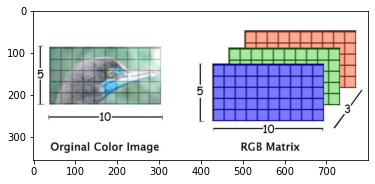

In [7]:
# read an image
img = cv2.imread("img/image_tensor.png")
# can show via matplotlib
plt.imshow(img)

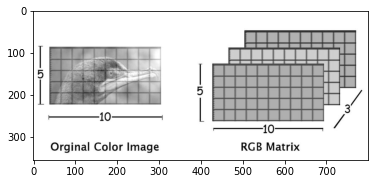

In [10]:
# read an image in grayscale -- notice the non-pythonic origin of CV2
img_bw = cv2.imread("img/image_tensor.png", flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img_bw, cmap="gray")

In [8]:
# be careful about nonexisting paths, as OpenCV does not check for existence
img_nonexist = cv2.imread("img/nonexisting_image.jpg")
type(img_nonexist)

NoneType

You might want to use a helper function for that (if efficiency is not your top priority)

In [ ]:
def imread(path, **kwargs):
    img = cv2.imread(path, **kwargs)
    if img is None:
        raise RuntimeError(f"Nonexisting image at path {path}")
    return img

What is the type of the image?

In [9]:
type(img)

numpy.ndarray

OpenCV in Python treats the images as NumPy arrays. This means that we can use the extensive support of NumPy to elaborate them.

Image shape (356, 800, 3)


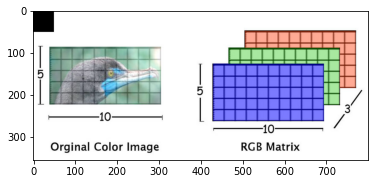

In [13]:
print("Image shape", img.shape)

## overlay a small box in the top-left part of the image
img[:50,:50] = np.array([0,0,0])
plt.imshow(img)

**Q**: By the way, did you notice something wrong with colors in the image above?

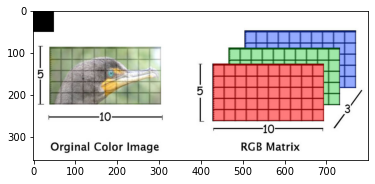

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Let us avoid future troubles by implementing another helper:

In [24]:
def implot(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Grayscale images are just matrices

In [15]:
img_rgb.shape

(356, 800, 3)

We can even use NumPy to create some simple images

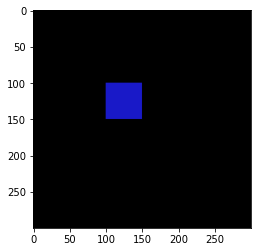

In [25]:
created_image = np.zeros((300, 300, 3), dtype="uint8") # notice the dtype!!
created_image[100:150, 100:150] = np.array([200, 25, 25], dtype="uint8")
implot(created_image)

Let us quickly go to more "advanced" stuff.

### Image resizing

Just use `cv2.resize`

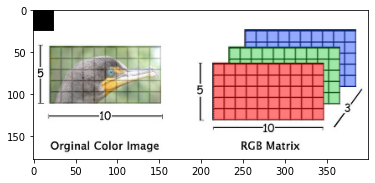

In [28]:
h, w = img.shape[:2]
resizing_factor = 0.5
new_h = int(h * resizing_factor)
new_w = int(w * resizing_factor)
# be careful at the order here, we have (WIDTH x HEIGHT)!!
img_res = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4) # interpolation is necessary for both upscaling and downscaling
implot(img_res)